# NN

## Prepare execution

### Imports

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

### Load both datasets

In [12]:
train_df = pd.read_csv('../data/loan_data_prepared_train.csv')
test_df = pd.read_csv('../data/loan_data_prepared_test.csv')

### Goal Column

In [13]:
target_col = 'loan_status'

### Split X and Y

In [14]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

## Train Model

### Create NN model

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/ced/src/ml-models-comparison/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

### Fit model

In [17]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8501 - auc: 0.8913 - loss: 0.3183
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.9098 - auc: 0.9630 - loss: 0.1989
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9146 - auc: 0.9654 - loss: 0.1907
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.9146 - auc: 0.9663 - loss: 0.1874
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.9185 - auc: 0.9676 - loss: 0.1828
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.9222 - auc: 0.9706 - loss: 0.1761
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9203 - auc: 0.9698 - loss: 0.1785
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.9235 - auc: 0.9708 - loss: 0.1723
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.9189 - auc: 0.9694 - loss: 0.1769
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accur

## Test

### Predict output

In [18]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


### Evaluate model on test data

In [19]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_binary), 3))

Accuracy: 0.919


### Display Confusion Matrix

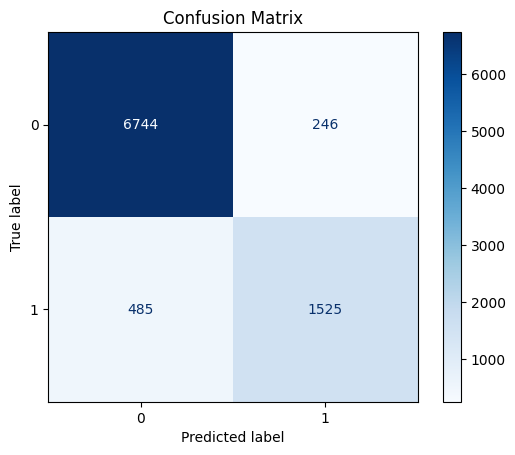

In [20]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()